# Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing the Dataset

In [2]:
from urllib.request import urlretrieve

In [3]:
iris = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
urlretrieve(iris)
df = pd.read_csv(iris, sep=',')
df.columns = ['sepal_length','sepal_width','petal_length','petal_width','species']
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
5,4.6,3.4,1.4,0.3,Iris-setosa
6,5.0,3.4,1.5,0.2,Iris-setosa
7,4.4,2.9,1.4,0.2,Iris-setosa
8,4.9,3.1,1.5,0.1,Iris-setosa
9,5.4,3.7,1.5,0.2,Iris-setosa


# Data Analysis And Visualization

In [4]:
df.shape

(149, 5)

In [5]:
df.info

<bound method DataFrame.info of      sepal_length  sepal_width  petal_length  petal_width         species
0             4.9          3.0           1.4          0.2     Iris-setosa
1             4.7          3.2           1.3          0.2     Iris-setosa
2             4.6          3.1           1.5          0.2     Iris-setosa
3             5.0          3.6           1.4          0.2     Iris-setosa
4             5.4          3.9           1.7          0.4     Iris-setosa
..            ...          ...           ...          ...             ...
144           6.7          3.0           5.2          2.3  Iris-virginica
145           6.3          2.5           5.0          1.9  Iris-virginica
146           6.5          3.0           5.2          2.0  Iris-virginica
147           6.2          3.4           5.4          2.3  Iris-virginica
148           5.9          3.0           5.1          1.8  Iris-virginica

[149 rows x 5 columns]>

In [6]:
df.describe

<bound method NDFrame.describe of      sepal_length  sepal_width  petal_length  petal_width         species
0             4.9          3.0           1.4          0.2     Iris-setosa
1             4.7          3.2           1.3          0.2     Iris-setosa
2             4.6          3.1           1.5          0.2     Iris-setosa
3             5.0          3.6           1.4          0.2     Iris-setosa
4             5.4          3.9           1.7          0.4     Iris-setosa
..            ...          ...           ...          ...             ...
144           6.7          3.0           5.2          2.3  Iris-virginica
145           6.3          2.5           5.0          1.9  Iris-virginica
146           6.5          3.0           5.2          2.0  Iris-virginica
147           6.2          3.4           5.4          2.3  Iris-virginica
148           5.9          3.0           5.1          1.8  Iris-virginica

[149 rows x 5 columns]>

In [7]:
# Printing the number of types , the iris flower can be  classified into:

print(df['species'].value_counts())

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        49
Name: species, dtype: int64


<Axes: xlabel='species', ylabel='count'>

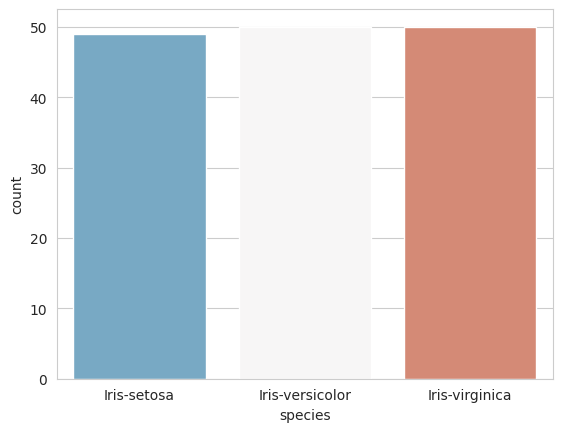

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='species',data=df,palette='RdBu_r')

## Data Visualization Using Boxplots

Using boxplots , we can easily visualize which column has more impact on the classification.

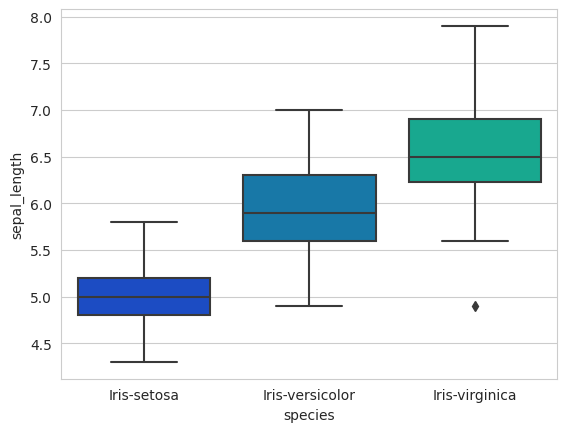

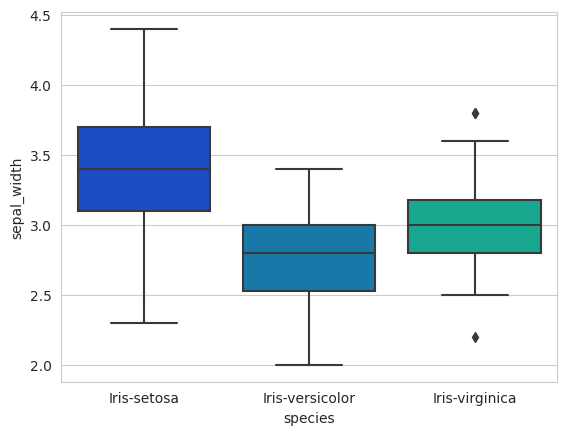

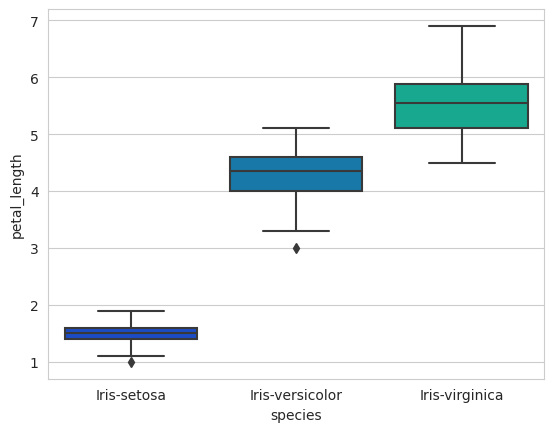

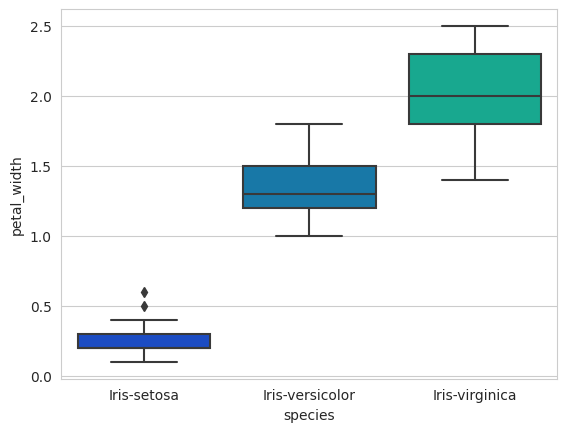

<Figure size 640x480 with 0 Axes>

In [9]:
l=list(df.columns[0:])
for i in range(len(l)-1):
    sns.boxplot(x='species',y=l[i], data=df, palette='winter')
    plt.figure()

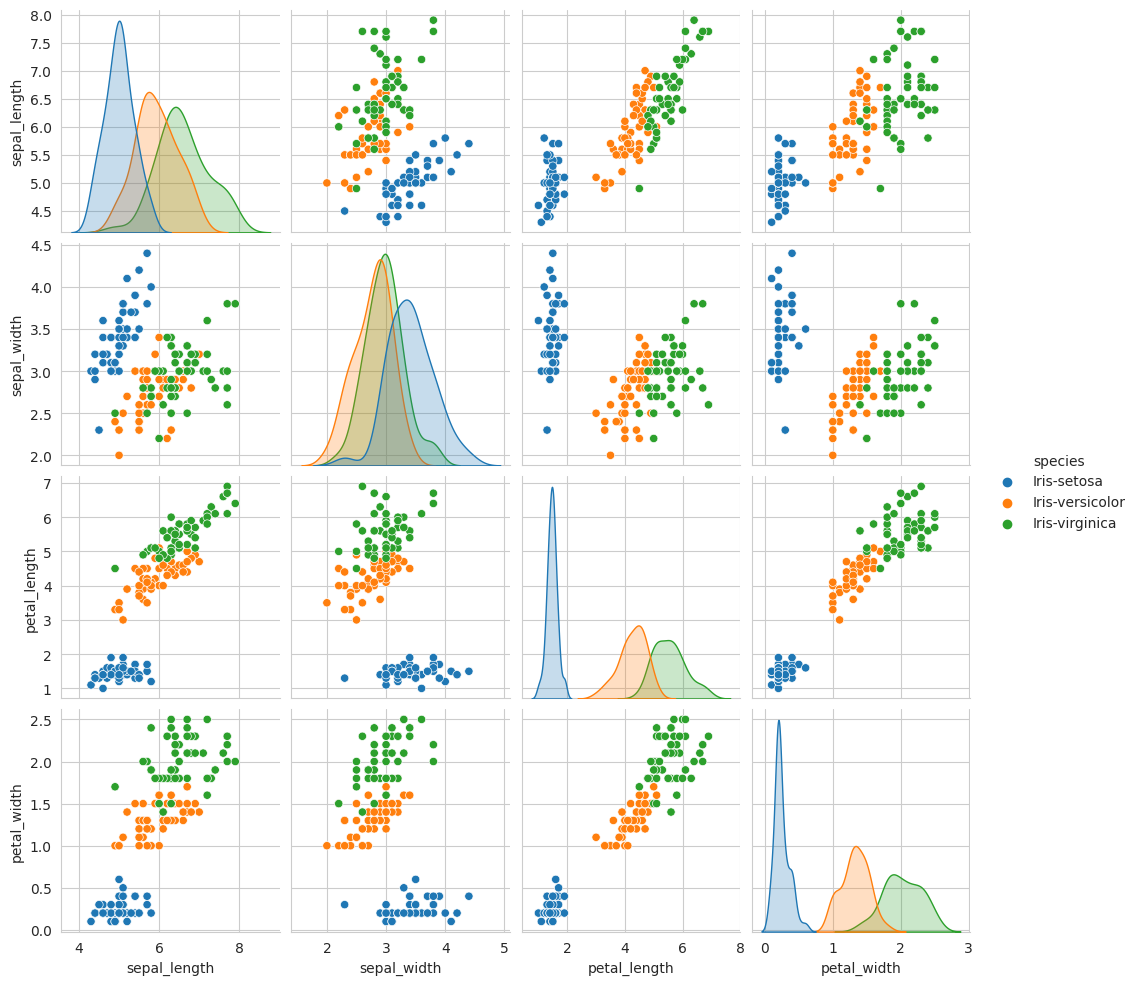

In [11]:
sns.pairplot(data = df , hue = 'species')

# Training and prediction

### Train Test Split

In [12]:
features = df.drop('species', axis=1)
features.head()

,sepal_length,sepal_width,petal_length,petal_width
0,4.9,3.0,1.4,0.2
1,4.7,3.2,1.3,0.2
2,4.6,3.1,1.5,0.2
3,5.0,3.6,1.4,0.2
4,5.4,3.9,1.7,0.4


In [13]:
target = df['species']
target.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: species, dtype: object

In [14]:
# using test_train_split library to split our data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=101)

In [15]:
print("Features data used for training the model is : ", X_train.shape)
print("Target data used for training the model is : ", y_train.shape)
print("Features data used for testing the model is : ", X_test.shape)
print("Target data used for training the model is : ", y_test.shape)

Features data used for training the model is :  (119, 4)
Target data used for training the model is :  (119,)
Features data used for testing the model is :  (30, 4)
Target data used for training the model is :  (30,)


# Model Training

Here, we will use the Decision Tree Classifer as our model and train it

In [19]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion = "gini", min_samples_split = 2)
model.fit(X_test, y_test)
predictions = model.predict(X_test)

In [20]:
Prediction_df = pd.DataFrame({'Actual':y_test,'Prediction':predictions})
Prediction_df

,Actual,Prediction
16,Iris-setosa,Iris-setosa
55,Iris-versicolor,Iris-versicolor
124,Iris-virginica,Iris-virginica
89,Iris-versicolor,Iris-versicolor
32,Iris-setosa,Iris-setosa
92,Iris-versicolor,Iris-versicolor
91,Iris-versicolor,Iris-versicolor
118,Iris-virginica,Iris-virginica
69,Iris-versicolor,Iris-versicolor
1,Iris-setosa,Iris-setosa


In [21]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))

[[ 9  0  0]
 [ 0 12  0]
 [ 0  0  9]]


In [22]:
print(classification_report(y_test,predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       1.00      1.00      1.00        12
 Iris-virginica       1.00      1.00      1.00         9

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



If i compare this to my previous task that i did (Iris Flowers Classification usin SVM) , it can be seen very clearly that the accuracy has incrased by changing the model.

# Visualizing the Decision Tree

In [23]:
from sklearn import tree

[Text(0.4, 0.8333333333333334, 'petal_length <= 2.6\ngini = 0.66\nsamples = 30\nvalue = [9, 12, 9]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 9\nvalue = [9, 0, 0]'),
 Text(0.6, 0.5, 'petal_length <= 4.85\ngini = 0.49\nsamples = 21\nvalue = [0, 12, 9]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 12\nvalue = [0, 12, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 9\nvalue = [0, 0, 9]')]

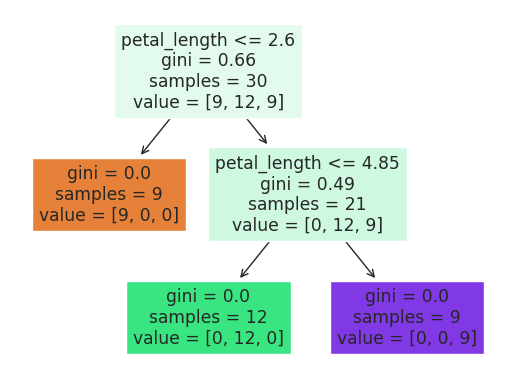

In [24]:
tree.plot_tree(model, filled = True, feature_names = ['sepal_length','sepal_width','petal_length','petal_width'] )

# Making Predictions On New Data

In [28]:
input = pd.DataFrame(np.array([4.9,4.2,1.6,0.1]).reshape(1,-1), columns =  ['sepal_length','sepal_width','petal_length','petal_width'])

predicted_output = model.predict(input)
predicted_output

array(['Iris-setosa'], dtype=object)

# Saving The Model using Pickle

In [30]:
import pickle

pickle.dump(model, open("decisionTreeModel.pkl","wb"))

In [31]:
loaded_model = pickle.load(open("decisionTreeModel.pkl","rb"))
loaded_model.score(X_test, y_test)

1.0